In [1]:
import pandas as pd

df = pd.read_excel("income.xlsx")
print(df.shape)
df.head()

(8, 3)


,Name,Age,Income (Thousands $)
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87


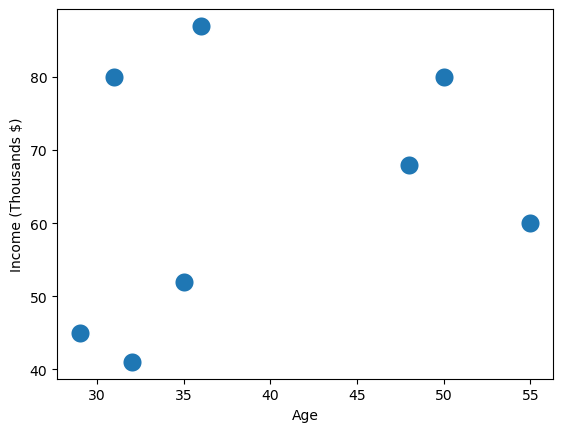

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.scatterplot(df,x="Age",y="Income (Thousands $)",s=200)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,linkage="average")
hc.fit(df[["Age","Income (Thousands $)"]])


AgglomerativeClustering(linkage='average')

In [11]:
hc.labels_

array([1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [23]:
df["Cluster"] = hc.labels_
df

,Name,Age,Income (Thousands $),Cluster
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,0
5,David,48,68,0
6,Ismail,31,80,0
7,Sheela,55,60,0


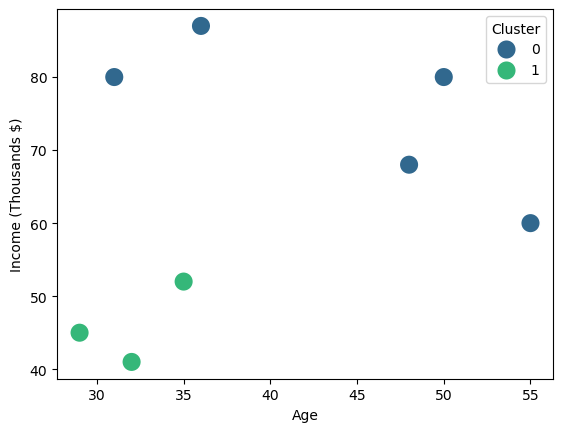

In [16]:
sb.scatterplot(df,x="Age",y="Income (Thousands $)",s=200,hue="Cluster",palette="viridis")
plt.show()

In [17]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

X = df[["Age","Income (Thousands $)"]]
Z = linkage(X,method="average")
Z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

### Plotting the Dendrogram

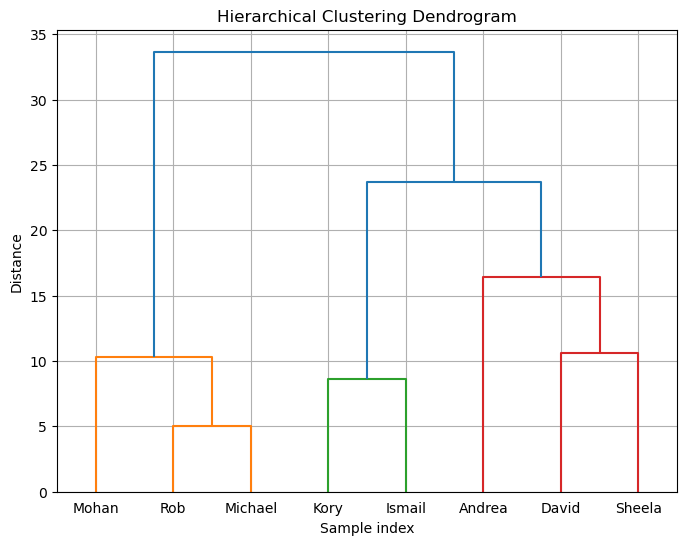

In [22]:
plt.figure(figsize=(8,6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=df['Name'].values, leaf_rotation=0, leaf_font_size=10)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [24]:
clusters = fcluster(Z,t=3,criterion="maxclust")
clusters

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [25]:
df["Cluster"] = clusters
df

,Name,Age,Income (Thousands $),Cluster
0,Rob,29,45,1
1,Andrea,50,80,3
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,3
6,Ismail,31,80,2
7,Sheela,55,60,3


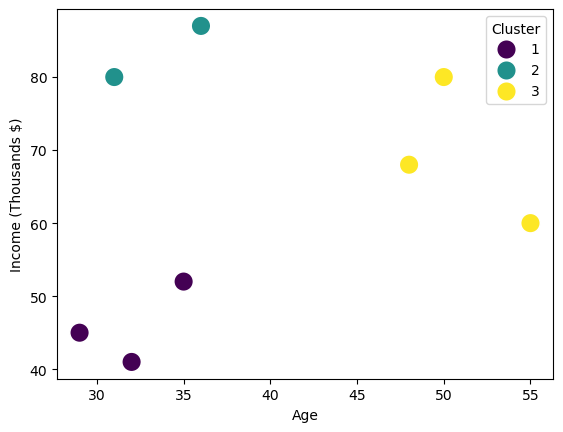

In [27]:
sb.scatterplot(df,x="Age",y="Income (Thousands $)",hue="Cluster",s=200,palette="viridis")
plt.show()